<center><h1>Khatri_Surbhi_HW5</h1></center>
<br>
<br>

Name: Surbhi Khatri
<br>
Github Username: surbhikhatri
<br>
USC ID: 9893833133

Import packages

In [139]:
import pandas as pd
from sklearn import tree
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from skmultilearn.problem_transform import LabelPowerset
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import xgboost as xgb
warnings.filterwarnings("ignore")

## The LASSO and Boosting for Regression

### (a) Obtain Data

In [144]:
# df = pd.read_csv("./../data/Homework5Data/diagnosis.data", sep='\s+', header=None, encoding="utf-16", decimal=',')
df = pd.read_csv("./../data/Homework5Data/communities.data", header=None, na_values="?")
df_train = df[ : 1495]
df_test = df[1495 : ]
print(df_test)


      0      1        2                  3    4     5     6     7     8    \
1495    6    NaN      NaN     MillValleycity    8  0.00  0.20  0.03  0.91   
1496   48    NaN      NaN        LiveOakcity    8  0.00  0.55  0.13  0.78   
1497   35    NaN      NaN       Portalescity    8  0.00  0.52  0.04  0.59   
1498   42   17.0  25112.0      Fallstownship    8  0.04  0.51  0.07  0.92   
1499   51  683.0  48952.0       Manassascity    8  0.03  0.59  0.20  0.75   
...   ...    ...      ...                ...  ...   ...   ...   ...   ...   
1989   12    NaN      NaN  TempleTerracecity   10  0.01  0.40  0.10  0.87   
1990    6    NaN      NaN        Seasidecity   10  0.05  0.96  0.46  0.28   
1991    9    9.0  80070.0      Waterburytown   10  0.16  0.37  0.25  0.69   
1992   25   17.0  72600.0        Walthamcity   10  0.08  0.51  0.06  0.87   
1993    6    NaN      NaN        Ontariocity   10  0.20  0.78  0.14  0.46   

       9    ...   118   119   120   121   122   123  124   125   126   127 

### (b) Missing values

In [145]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df.loc[:, 5:126])
fixed = imputer.transform(df.loc[:, 5:126])
df_fixed = pd.DataFrame(fixed)
print(df_fixed)

       0     1     2     3     4     5     6     7     8     9    ...  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1989  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...   
1990  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...   
1991  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...   
1992  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...   
1993  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...   

           112   113   114   115       116       117       118       119  \
0     0.290000  0.12  0.26  0.20  0.060000  0.0

### (c) Plot a correlation matrix

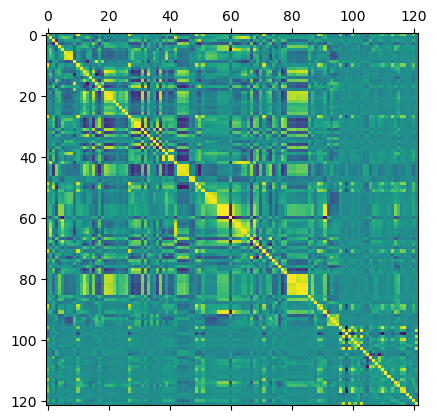

In [146]:
corrMatrix = df_fixed.corr()
# print(corrMatrix)
plt.matshow(corrMatrix)
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [147]:
# CV=std-dev/mean
CV = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
cv_val = df_fixed.apply(CV)
print("Coefficient of Variation CV:\n", cv_val)

Coefficient of Variation CV:
 0      220.350254
1       35.329830
2      141.092040
3       32.378156
4      135.916219
          ...    
117     73.010662
118     12.233126
119     36.804007
120    255.526600
121     33.728080
Length: 122, dtype: float64


### (e) Scatter plots and box plots for highest CV features

In [148]:
# b √ 128 c features with highest CV
c = math.floor(math.sqrt(128))
cv_val.sort_values(ascending=False, inplace=True)
cv_val = cv_val[: c]
print("Top floor(sqrt(128)) features are:")
print(df.loc[:, cv_val.index])

Top floor(sqrt(128)) features are:
       90    89    49    51    120   27   0     10    71   113   5  
0     0.34  0.38  0.59  0.56  0.20  0.32    8  0.17  0.28  0.1  0.19
1     0.37  0.40  0.47  0.39  0.45  0.33   53  0.07  0.17  NaN  0.00
2     0.31  0.27  0.44  0.43  0.02  0.27   24  0.04  0.43  NaN  0.00
3     0.89  0.77  0.54  0.65  0.28  0.39   34  0.10  1.00  NaN  0.04
4     0.38  0.38  0.91  0.85  0.02  0.28   42  0.05  0.37  NaN  0.01
...    ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   ...
1989  0.41  0.41  0.68  0.59  0.05  0.27   12  0.16  0.40  NaN  0.01
1990  0.54  0.61  0.63  0.70  0.20  0.26    6  0.32  0.87  NaN  0.05
1991  0.37  0.39  0.42  0.47  0.18  0.25    9  0.25  0.37  0.0  0.16
1992  0.64  0.75  0.65  0.71  0.33  0.29   25  0.10  0.26  0.0  0.08
1993  0.54  0.61  0.59  0.60  0.05  0.32    6  0.77  0.89  0.0  0.20

[1994 rows x 11 columns]


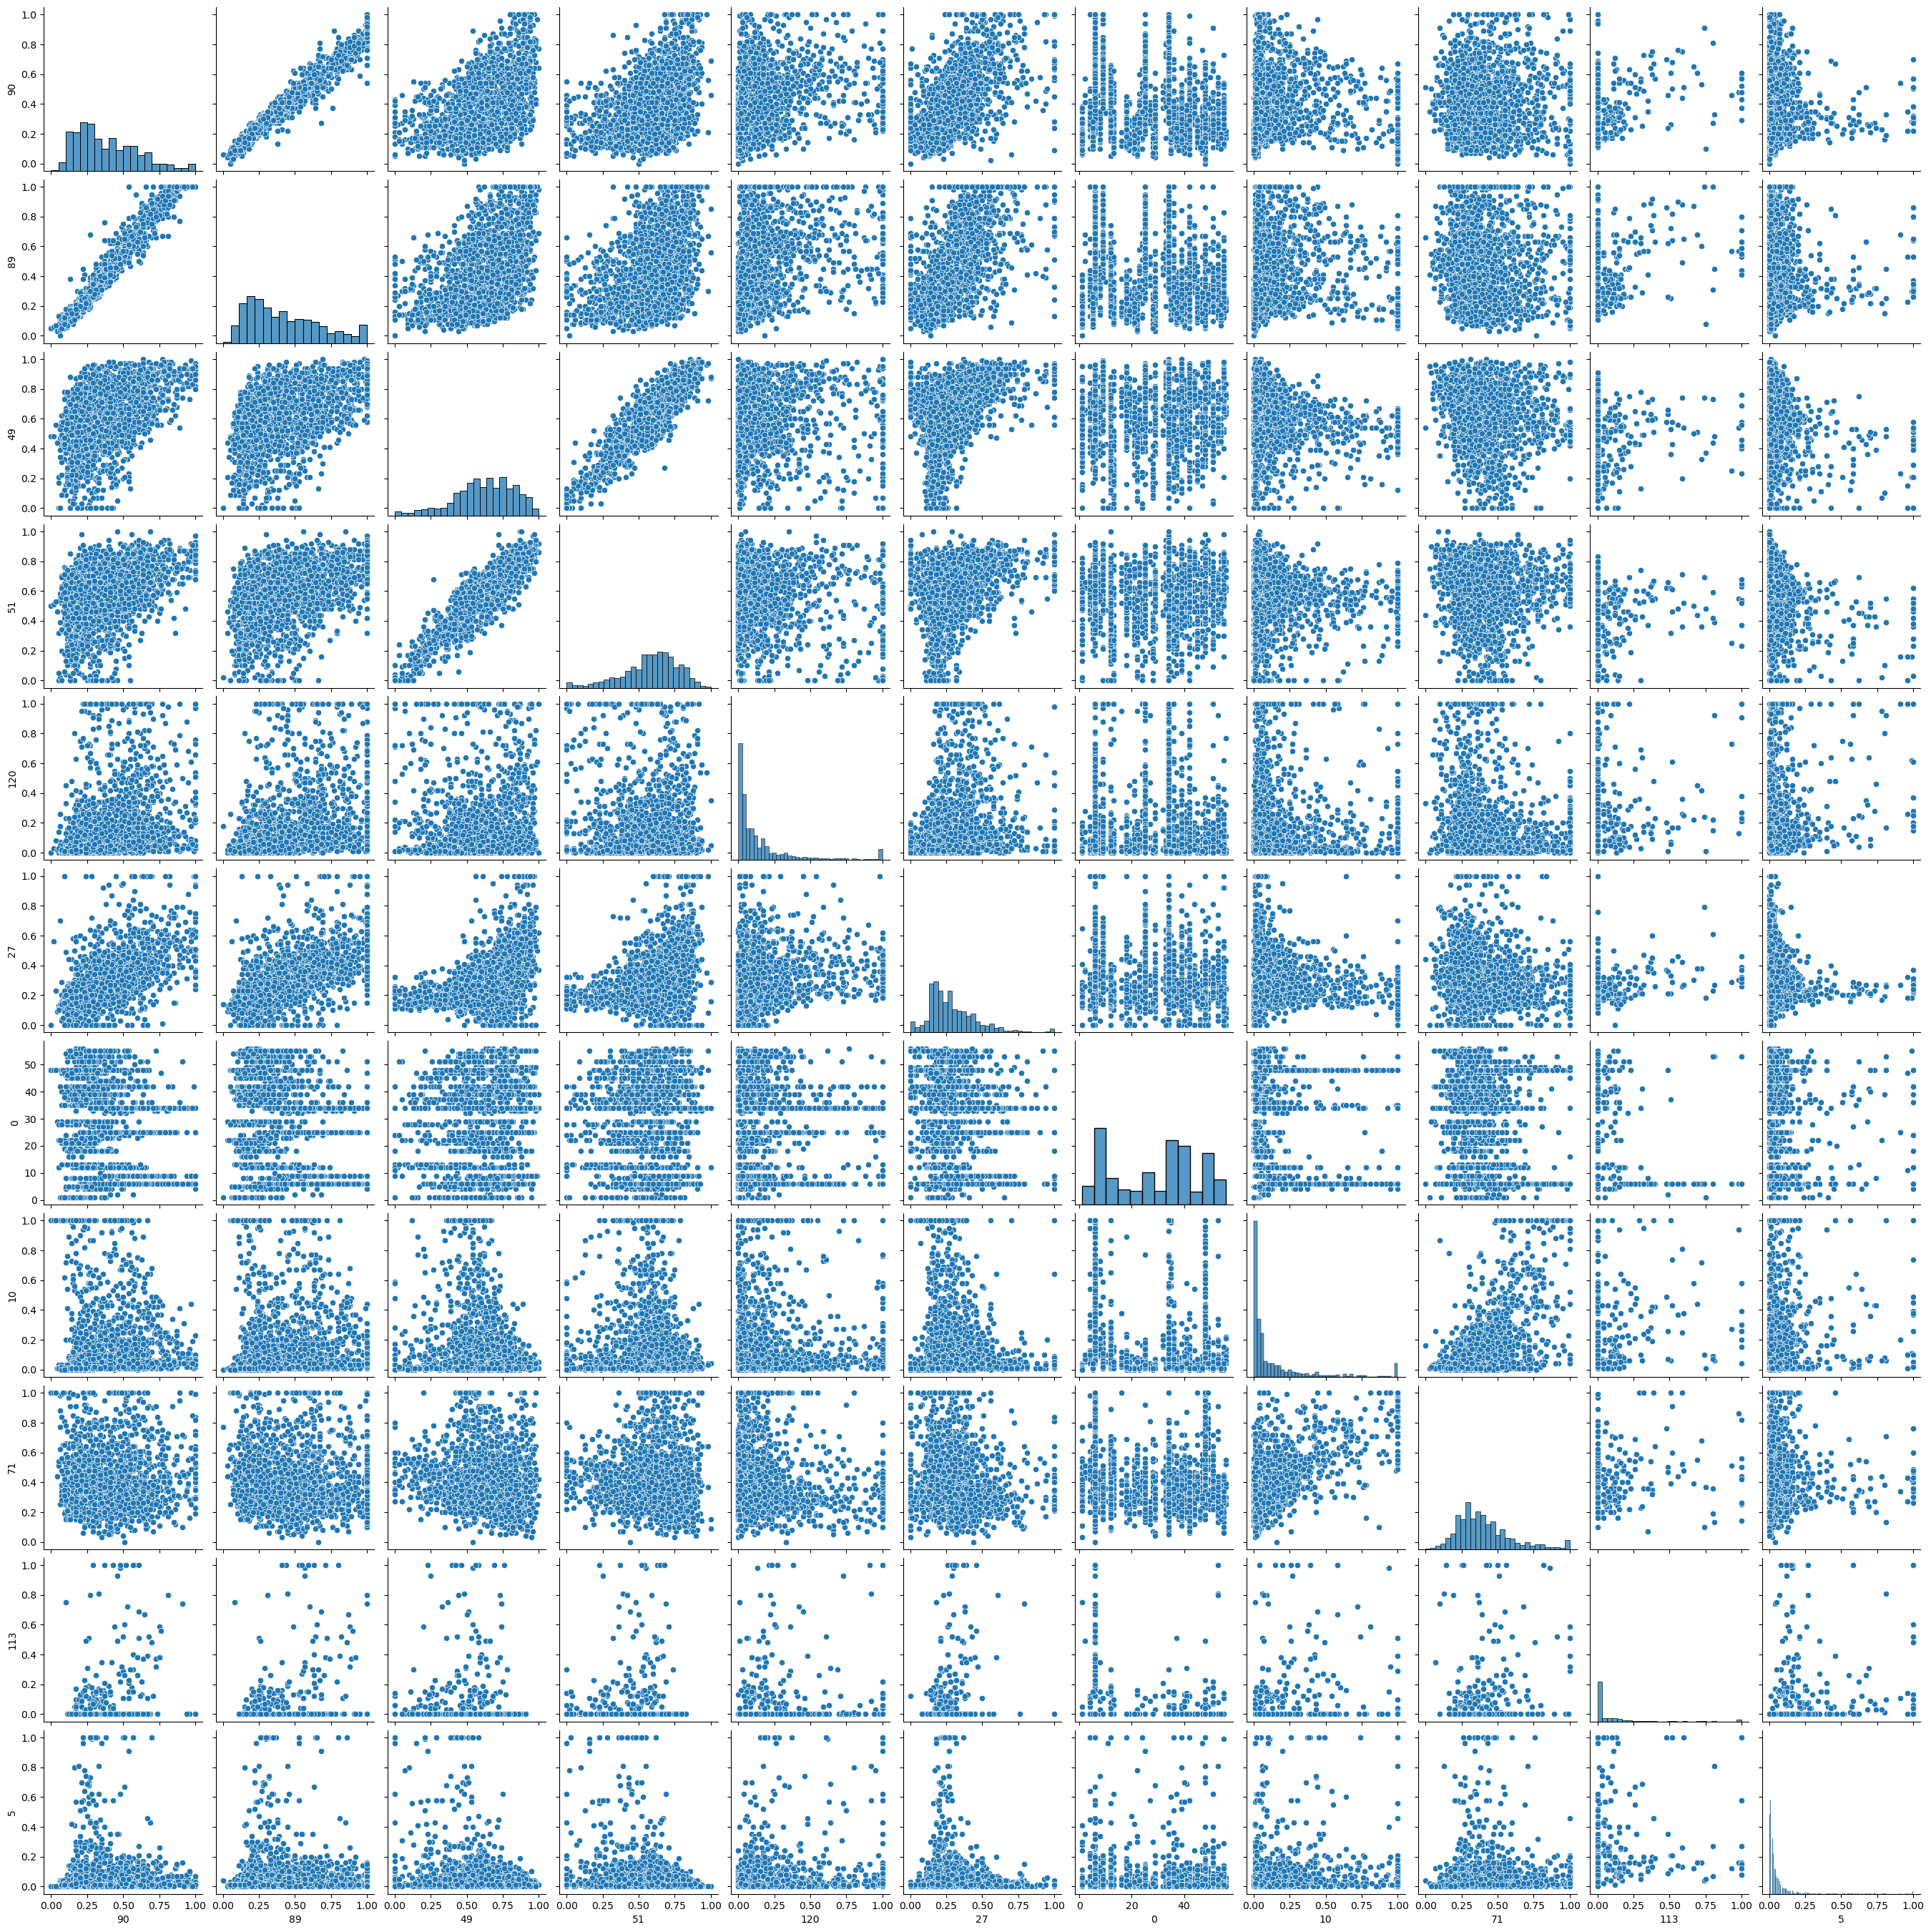

In [149]:
sns.pairplot(df.loc[:, cv_val.index])

Just looking at scatter plot is not enough to understand the relationship between all the features. Correlation btw some of these can be seen such as feature 90 and 89 seems to be positiviely related.

### (f) Fit a linear model

In [150]:
# Linear model with 1495 rows in train and rest in test
model = LinearRegression().fit(df_fixed.loc[:1495], df.loc[:1495, 127:127])
model.score(df_fixed.loc[1495:], df.loc[1495:, 127:127])
print("MSE Linear Model:")
mse = mean_squared_error(df.loc[1495:, 127:127], model.predict(df_fixed.loc[1495:]))
print(mse)

MSE Linear Model:
0.7901932501321592


### (g) Fit a ridge regression model

In [151]:
# when choosing lambda should give varied values of alpha: using the example taught in class e^-5 - e^5
model = RidgeCV(alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5).fit(df_fixed.loc[:1495], df.loc[:1495, 127:])
L2 = Ridge(alpha=model.alpha_).fit(df_fixed.loc[:1495], df.loc[:1495, 127:])

print("MSE Regression Model on training data, with lambda chosen by CV:")
print(mean_squared_error(df.loc[1495:,127:], L2.predict(df_fixed.loc[1495:])))

MSE Regression Model on training data, with lambda chosen by CV:
0.01773791115857764


### (h) Fit a LASSO model

In [152]:
# when choosing lambda should give varied values of alpha: using the example taught in class e^-5 - e^5
model = LassoCV(alphas=[1e-5, 1e-4,1e-3, 1e-2, 1e-1, 1, 1e1, 1e1, 1e2, 1e3, 1e4, 1e5], cv=5, random_state=0)
model.fit(df_fixed.loc[:1495], df.loc[:1495 ,127:127])

print("MSE Lasso with Cross-Validation over lambda: ", mean_squared_error(df.loc[1495:,127:127], model.predict(df_fixed.loc[1495:])))

print("Selected Features:")
print([i for i in range(len(model.coef_)) if model.coef_[i] > .00000000000000000000001])

MSE Lasso with Cross-Validation over lambda:  0.01779134770115927
Selected Features:
[2, 6, 9, 11, 14, 16, 17, 24, 25, 26, 31, 33, 36, 38, 39, 50, 59, 64, 68, 69, 70, 71, 74, 77, 85, 86, 89, 90, 91, 94, 99, 102, 107, 108, 113, 114, 116, 118, 119, 120]


In [153]:
model = LassoCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e1, 1e2, 1e3, 1e4], cv=5, random_state=0)
df_fixed_new = pd.DataFrame()

for i in range(len(df_fixed.columns)):
    df_fixed_new[i] = (df_fixed[i] - df_fixed[i].mean()) / df_fixed[i].std()

model.fit(df_fixed_new.loc[:1495], df.loc[:1495, 127:127])
mse = mean_squared_error(df.loc[1495:, 127:127], model.predict(df_fixed_new.loc[1495:]))

print("MSE after std lasso with crossv-alidation on lambda: ", mse)
print("Selected Features:")
print([i for i in range(len(model.coef_)) if model.coef_[i] > .00000000000000000000001])

MSE after std on lasso with crossv-alidation on lambda:  0.017758463141095134
Selected Features:
[2, 6, 11, 14, 16, 17, 24, 25, 26, 33, 38, 39, 50, 59, 68, 69, 71, 74, 85, 86, 89, 90, 91, 94, 99, 102, 107, 108, 113, 114, 116, 118, 119]


### (i) Fit a PCR model

In [154]:
cv_scores = []
m_val = range(1, len(df_fixed.columns) + 1)

# with M (the number of principal components) chosen by cross-validation
for m in m_val:
    pcr_pipeline = Pipeline([('scaler', StandardScaler()), ('pca',  PCA(n_components=m)), ('linear_regression', LinearRegression())])
    cv_scores.append(np.mean(cross_val_score(pcr_pipeline, df_fixed.loc[:1495], df.loc[:1495,127:127], cv=5)))
# output th best M with max cv score
best_m = m_val[np.argmax(cv_scores)]
print("The best M is:", best_m)

The best M is: 95


In [155]:
# use best m to apply pca
pca = PCA(n_components=best_m)
X_train_pca = pca.fit_transform(df_fixed.loc[:1495])

linear_new = LinearRegression()
linear_new.fit(X_train_pca, df.loc[:1495,127:127])

X_test_pca = pca.transform(df_fixed.loc[1495:])
y_pred = linear_new.predict(X_test_pca)
mse = mean_squared_error(df.loc[1495:, 127:127], y_pred)
print("MSE PCR model with M:", mse)

MSE PCR model with M: 0.0184994558427034


### (j) Fit a boosting tree

In [160]:
cv_scores = []
a = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e1, 1e2, 1e3, 1e4, 1e5]
for alpha in a:
    model = xgb.XGBRegressor(alpha=alpha)
    model.fit(df_fixed.loc[:1495], df.loc[:1495, 127:127])
    cv_scores.append(np.mean(cross_val_score(model, df_fixed.loc[:1495], df.loc[:1495,127:127], cv=5)))
best_alpha = a[np.argmax(cv_scores)]
print("best alpha:", best_alpha)

best alpha: 1


In [161]:
# using the best selected aplpha to apply xgboost regressor
model = xgb.XGBRegressor(alpha=best_alpha)
model.fit(df_fixed.loc[:1495], df.loc[:1495, 127:127])
mse = mean_squared_error(model.predict(df_fixed.loc[1495:]), df.loc[1495:,127:127])
print("MSE XGBoost model ", mse)


MSE XGBoost model  0.017834785747257418
